# EDA + Model 


In [61]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [23]:
baseline = pd.read_pickle("../data/data_v1.pkl")

In [25]:
baseline.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0.0


In [54]:
y = baseline['diagnosis_M']
X = baseline.drop(['diagnosis_M','area_worst'], axis = 1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 5)
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (455, 29) Test: (114, 29)


In [56]:
def train_model (model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print('for' + " " + f'{model}')
    print(classification_report(y_test, y_pred))

    # features selection
    permutation_score = permutation_importance(model,
                                           X_test, y_test,
                                           scoring='recall',
                                           random_state=3,
                                           n_repeats=100) 

    # Unstack results
    importance_df = pd.DataFrame(np.vstack((X_test.columns,
                                        permutation_score.importances_mean)).T) 

    importance_df.columns=['feature','feature importance']

    # Order by importance
    features_selected = importance_df.sort_values(by="feature importance", ascending = False)
    print(features_selected)

In [57]:
def check_model (model, X_train, X_test, y_train, y_test):
    #Learning Curve   
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, X, y, cv=10,return_times=True)
    plt.plot(train_sizes,np.mean(train_scores,axis=1), label='train')
    plt.plot(train_sizes,np.mean(test_scores,axis=1), label='validation')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.ylim([0.5,1.05])
    plt.show()



In [58]:
X_train.shape

(455, 29)

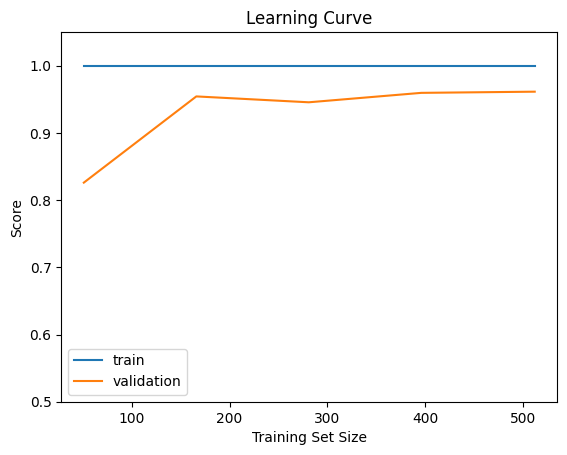

for RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        66
         1.0       0.98      0.94      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



KeyboardInterrupt: 

In [63]:
model = RandomForestClassifier()
check_model (model, X_train, X_test, y_train, y_test)
train_model (model, X_train, X_test, y_train, y_test)

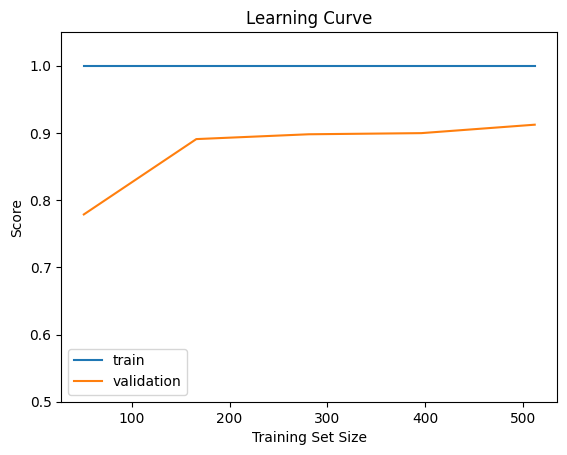

for DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96        66
         1.0       0.96      0.94      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

                    feature feature importance
26          concavity_worst           0.329792
23               area_worst           0.288542
10                radius_se             0.0725
27     concave points_worst           0.068125
4           smoothness_mean           0.034375
21            texture_worst           0.014792
29  fractal_dimension_worst           0.014167
22          perimeter_worst           0.012083
24         smoothness_worst           0.001458
16             concavity_se                0.0
28           symmetry_worst                0.0
25        compactness_worst                0.0
20             radius_worst      

In [51]:
model = DecisionTreeClassifier()
check_model (model, X_train, X_test, y_train, y_test)
train_model (model, X_train, X_test, y_train, y_test)

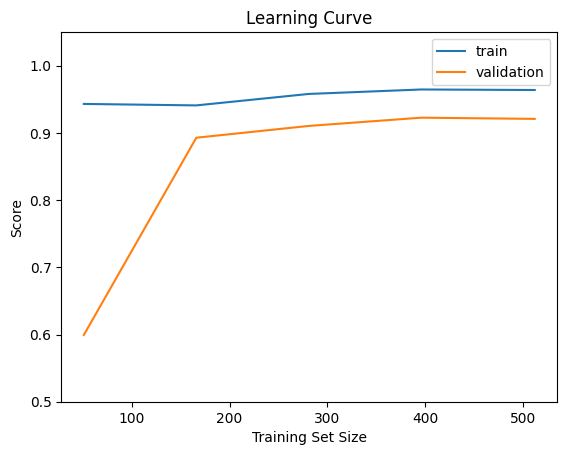

for KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        66
         1.0       1.00      0.88      0.93        48

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

                    feature feature importance
3                 area_mean           0.175208
22          perimeter_worst           0.045625
13                  area_se           0.012083
0               radius_mean                0.0
15           compactness_se                0.0
27           symmetry_worst                0.0
26     concave points_worst                0.0
25          concavity_worst                0.0
24        compactness_worst                0.0
23         smoothness_worst                0.0
19     fractal_dimension_se                0.0
18              symmetry_se                0.0
17        concave poin

In [60]:
model = KNeighborsClassifier(n_neighbors=3)
check_model (model, X_train, X_test, y_train, y_test)
train_model (model, X_train, X_test, y_train, y_test)

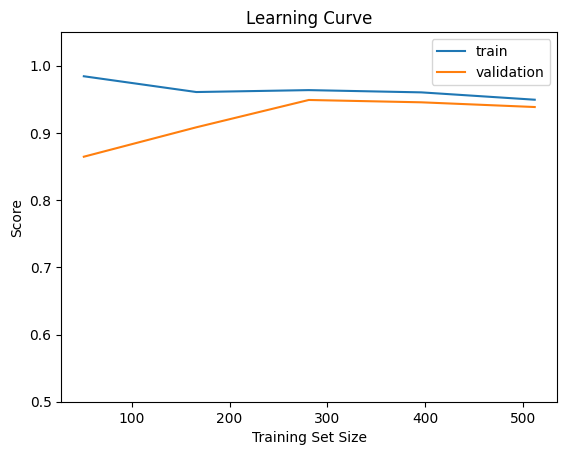

for LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        66
         1.0       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

                    feature feature importance
22          perimeter_worst           0.351667
23               area_worst           0.193125
3                 area_mean           0.118125
21            texture_worst           0.067083
2            perimeter_mean            0.03625
20             radius_worst           0.023542
0               radius_mean           0.012917
13                  area_se           0.007708
14            smoothness_se                0.0
24         smoothness_worst                0.0
19     fractal_dimension_se                0.0
18              symmetry_se                0.0
17        concave points_se          

In [53]:
model = LogisticRegression()
check_model (model, X_train, X_test, y_train, y_test)
train_model (model, X_train, X_test, y_train, y_test)

for DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       122
         1.0       0.85      0.91      0.88        68

    accuracy                           0.91       190
   macro avg       0.90      0.91      0.90       190
weighted avg       0.91      0.91      0.91       190



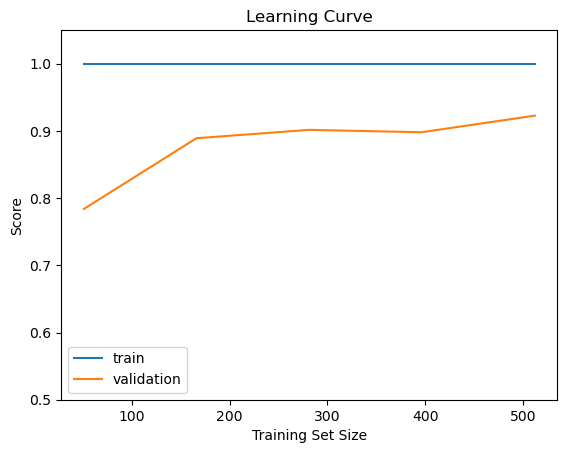

                    feature feature importance
6            concavity_mean           0.272353
3                 area_mean           0.098529
13                  area_se           0.098088
27     concave points_worst           0.092059
23               area_worst              0.055
19     fractal_dimension_se           0.017941
8             symmetry_mean           0.001912
0               radius_mean                0.0
16             concavity_se                0.0
28           symmetry_worst                0.0
26          concavity_worst                0.0
25        compactness_worst                0.0
24         smoothness_worst                0.0
22          perimeter_worst                0.0
20             radius_worst                0.0
18              symmetry_se                0.0
15           compactness_se                0.0
1              texture_mean                0.0
12             perimeter_se                0.0
10                radius_se                0.0
9    fractal_

In [128]:
model = DecisionTreeClassifier()
check_model (model, X_train, X_test, y_train, y_test)

In [62]:
# pipeline regression logistique
model_lr = make_pipeline(MinMaxScaler(), LogisticRegression())
model_lr.fit(X_train, y_train)
print('le score du modèle est :', model_lr.score(X_train,y_train))

le score du modèle est : 0.9648351648351648
